In [1]:
# https://medium.com/hockey-stick/tl-dr-bayesian-a-b-testing-with-python-c495d375db4d#.gnd3irz9o

In [6]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
people_in_branch = 4000

# Control == Alpaca, Experiment == Bear
control, experiment = np.random.rand(2,people_in_branch)

c_successes = sum(control < 0.16)
# Bears are about 10% better than alpacas
e_successes = sum(experiment < 0.176)

c_failures = people_in_branch - c_successes
e_failures = people_in_branch - e_successes

# Our priors
prior_successes = 8
prior_failures = 16

In [48]:
fig, ax = plt.subplots(1,1)

# Control
c_alpha, c_beta = c_successes + prior_successes, c_failures + prior_failures

# Control
e_alpha, e_beta = e_successes + prior_successes, e_failures + prior_failures


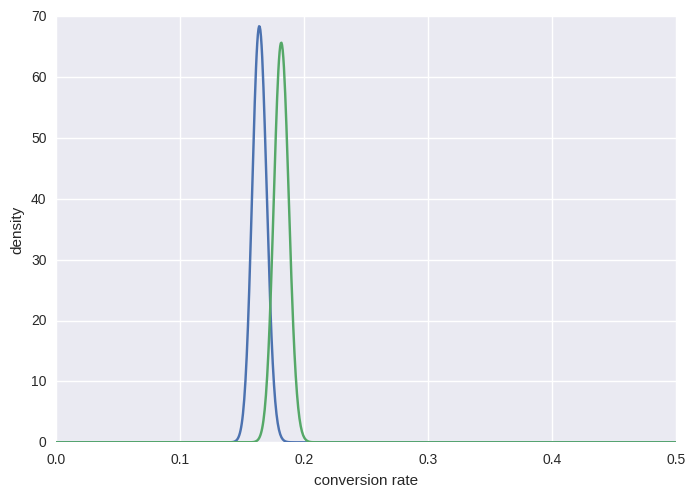

In [49]:
x = np.linspace(0.0, 0.5, 1000)

c_distribution = beta(c_alpha, c_beta)
e_distribution = beta(e_alpha, e_beta)

ax.plot(x, c_distribution.pdf(x))
ax.plot(x, e_distribution.pdf(x))

ax.set(xlabel='conversion rate', ylabel='density')

plt.show()

In [52]:
print(c_distribution.ppf([0.025,0.5,0.975]))
print(e_distribution.ppf([0.025,0.5,0.975]))

0.0250000058246
[ 0.15273598  0.16396024  0.17561215]
[ 0.16989985  0.1816073   0.19371993]


In [53]:
sample_size = 100000
c_samples = pd.Series([c_distribution.rvs() for _ in range(sample_size)])
e_samples = pd.Series([e_distribution.rvs() for _ in range(sample_size)])

p_ish_value = 1.0 - sum(e_samples > c_samples) / sample_size
print(p_ish_value)

0.01846


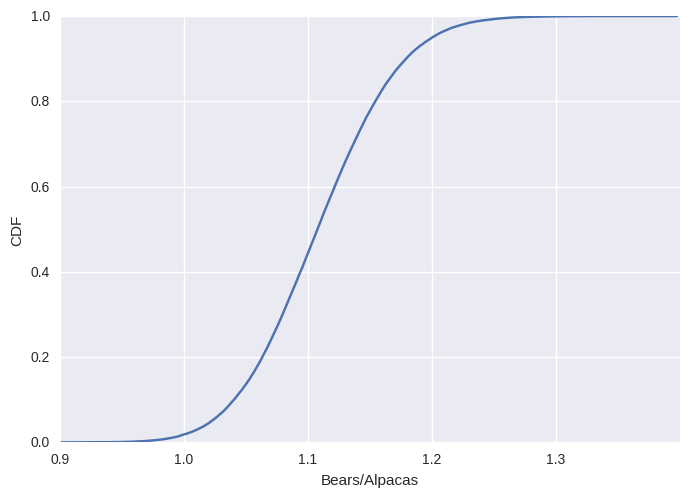

In [56]:
fig, ax = plt.subplots(1,1)
ser = pd.Series(e_samples/c_samples)

# Make the CDF
ser = ser.sort_values()
ser[len(ser)] = ser.iloc[-1]
cum_dist = np.linspace(0.,1.,len(ser))
ser_cdf = pd.Series(cum_dist, index=ser)

ax.plot(ser_cdf)
ax.set(xlabel='Bears/Alpacas', ylabel='CDF')
plt.show()